In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import os 


In [15]:
notebook_path = os.path.abspath("0. EDA.ipynb")
notebook_directory = os.path.dirname(notebook_path)

replacement_string = "data\\interim\\df_all_data_grouped.csv"
index = notebook_directory.find("\\notebooks")
modified_path = notebook_directory[:index]

modified_path += "\\" + replacement_string

In [16]:
df_grouped = pd.read_csv(modified_path, index_col=[0]) 
df_grouped.Date = pd.to_datetime(df_grouped['Date'])
df_grouped.index = pd.to_datetime(df_grouped.index)


In [17]:
df_grouped['index'] = range(len(df_grouped))

# Checking if there is a trend

In [18]:
model = smf.ols('Count ~ index + I(index**2)', df_grouped)
results = model.fit()

print(results.summary())

anova_results = anova_lm(results)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     249.3
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          2.93e-103
Time:                        13:33:12   Log-Likelihood:                -34402.
No. Observations:                4391   AIC:                         6.881e+04
Df Residuals:                    4388   BIC:                         6.883e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       779.9257     27.675     28.182

While the higher polynominals where significant as well, it did not change the rest so I sticked with the smallest polynominal

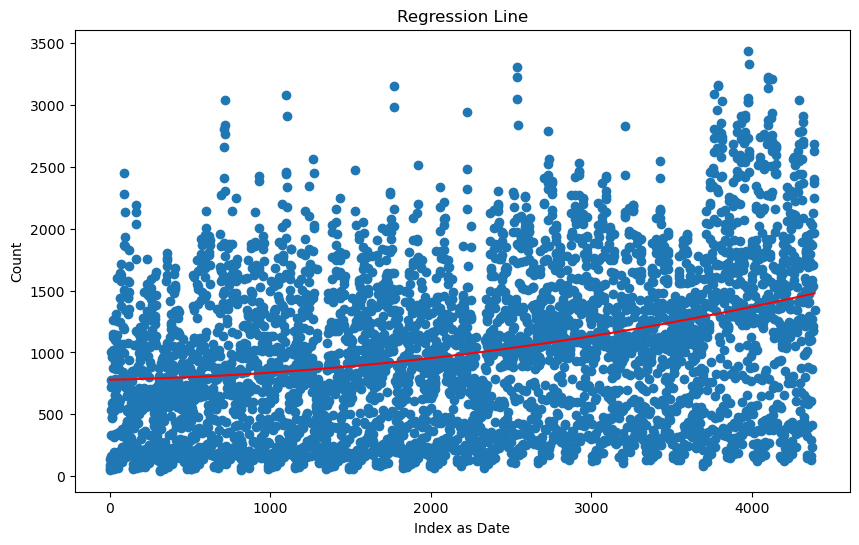

Regression function: Count = 779.9256875793795 + 0.02741706371832453 * index + 2.996762396672116e-05 * index


In [19]:

# Plot the regression line
plt.figure(figsize=(10,6))
plt.scatter(df_grouped['index'], df_grouped['Count'])
plt.plot(df_grouped['index'], results.predict(df_grouped), color='red')
plt.xlabel('Index as Date')
plt.ylabel('Count')
plt.title('Regression Line')
plt.show()

# Print the regression function
print(f'Regression function: Count = {results.params["Intercept"]} + {results.params["index"]} * index + {results.params["I(index ** 2)"]} * index')

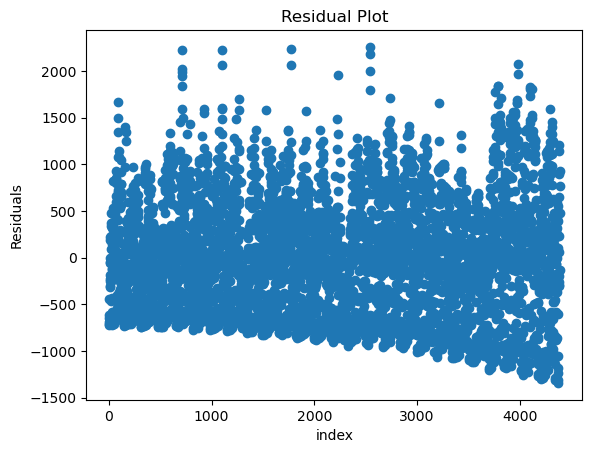

In [20]:
residuals = results.resid
fitted_values = results.fittedvalues

plt.scatter(df_grouped['index'], residuals)
plt.xlabel('index')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [21]:
# Define the Poisson regression formula
poisson_formula = 'Count ~ index + I(index**2)'

# Fit the Poisson regression model
poisson_results = smf.glm(formula=poisson_formula, data=df_grouped, family=sm.families.Poisson()).fit()

# Print the summary of the Poisson regression results
print(poisson_results.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                 4391
Model:                            GLM   Df Residuals:                     4388
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5065e+05
Date:                Wed, 27 Sep 2023   Deviance:                   1.6639e+06
Time:                        13:33:13   Pearson chi2:                 1.58e+06
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.6433      0.002   4245.511

In [22]:
# Get the predicted values from the model
predicted_values = poisson_results.predict(df_grouped['index'])

# Calculate the residuals
residuals = df_grouped['Count'] - predicted_values

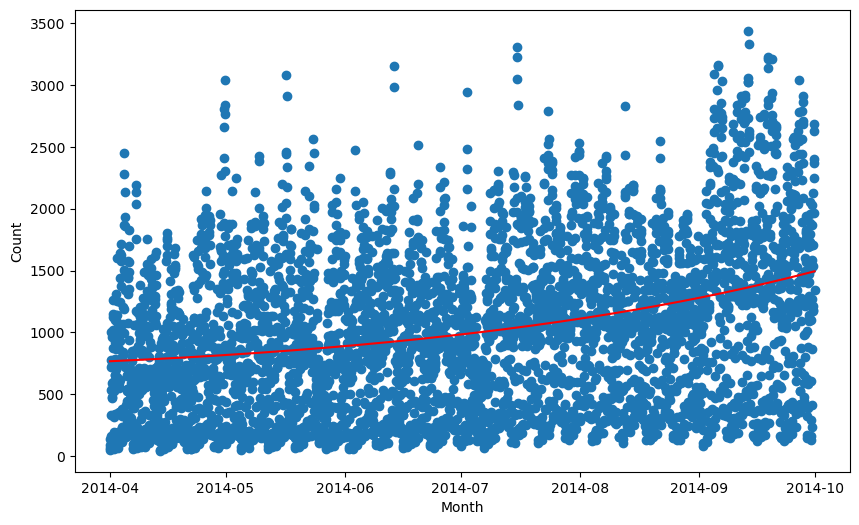

Regression function: Count = 6.64330250773832 + 7.569329175088603e-05 * index + 1.7319998606602938e-08 * index^2


In [23]:

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_grouped.index, df_grouped['Count'])
plt.plot(df_grouped.index, predicted_values, color='red')
plt.xlabel('Month')
plt.ylabel('Count')


# Display the plot
plt.show()

# Print the regression function
print(f'Regression function: Count = {poisson_results.params["Intercept"]} + {poisson_results.params["index"]} * index + {poisson_results.params["I(index ** 2)"]} * index^2')


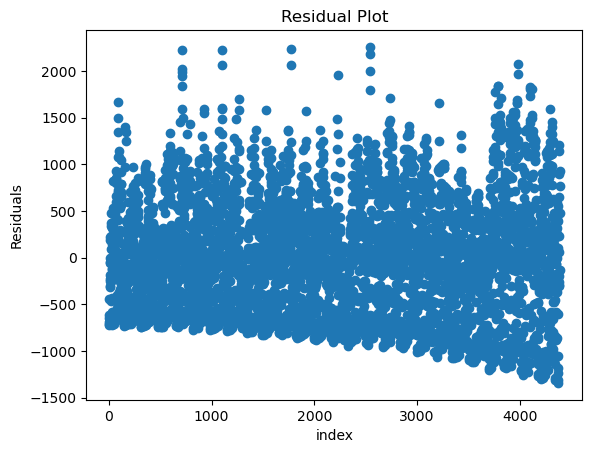

In [24]:
residuals = results.resid
fitted_values = results.fittedvalues

plt.scatter(df_grouped['index'], residuals)
plt.xlabel('index')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Checking if there is a periodicity

In [25]:
hourly_aggregated = df_grouped.groupby('Hour')['Count'].sum().reset_index()

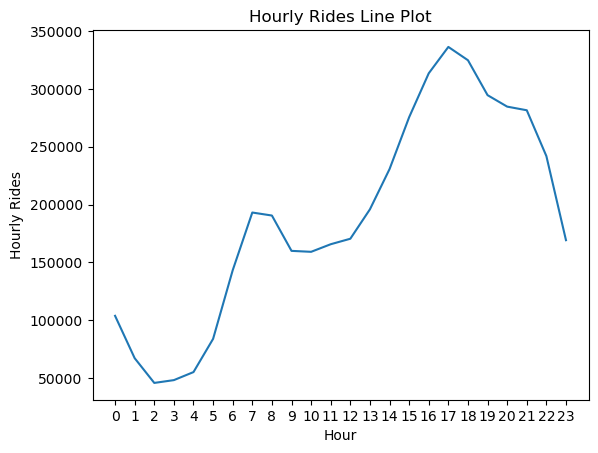

In [26]:
sns.lineplot(data=hourly_aggregated, x='Hour', y='Count')

# Set plot labels and title
plt.xlabel('Hour')
plt.ylabel('Hourly Rides')
plt.title('Hourly Rides Line Plot')

plt.xticks(range(24))

# Display the plot
plt.show()